# Fotometria

Una vez las imagenes se calibro podemos extraer el brillo de los objetos en la CCD. Existen diferentes maneras de extraer las cuentas:
- Lo mas sencillo es simplemente sumar las cuentas en una apertura alrededor del objeto
- Se puede estimar modelar la forma el objeto
- Sustraer los diferentes imagenes y crear un serie de tiempo como cambia el brillo con el tiempo.

![LC](markdown-img/curvaLuz.jpg)

## Coordenadas de estrellas

En astronomía y navegación, la esfera celeste es una esfera imaginaria de radio arbitrariamente grande, concéntrica con la Tierra. Todos los objetos del cielo del observador pueden considerarse proyectados sobre la superficie interior de la esfera celeste, como si fuera la parte inferior de una cúpula. La esfera celeste es una herramienta práctica para la astronomía esférica, que permite a los observadores trazar las posiciones de los objetos en el cielo cuando sus distancias son desconocidas o carecen de importancia.

Dado que los objetos astronómicos se encuentran a distancias tan remotas, la observación casual del cielo no ofrece ninguna información sobre las distancias reales. Todos los objetos parecen igualmente lejanos, como si estuvieran fijados en el interior de una esfera de radio grande pero desconocido, que gira de este a oeste por encima de la cabeza. Para los fines de la astronomía esférica, que sólo se ocupa de las direcciones de los objetos, es indiferente si esto es realmente así, o si es la Tierra la que gira mientras la esfera celeste permanece quieta.

![esphera](markdown-img/sphere.jpg)

El sistema de coordenadas ecuatoriales es un sistema de coordenadas celestes ampliamente utilizado para especificar las posiciones de los objetos celestes. 

El origen en el centro de la Tierra significa que las coordenadas son geocéntricas, es decir, vistas desde el centro de la Tierra como si ésta fuera transparente y no refractaria. El plano fundamental y la dirección primaria significan que el sistema de coordenadas, aunque alineado con el ecuador y el polo de la Tierra, no gira con la Tierra, sino que permanece relativamente fijo frente a las estrellas de fondo. Una convención de derechas significa que las coordenadas son positivas hacia el norte y hacia el este en el plano fundamental.

Las coordenadas esféricas de una estrella suelen expresarse como un par, ascensión recta y declinación, sin una coordenada de distancia. Debido a las grandes distancias a las que se encuentran la mayoría de los objetos celestes, los astrónomos suelen tener poca o ninguna información sobre sus distancias exactas, por lo que sólo utilizan la dirección. La dirección de los objetos suficientemente distantes es la misma para todos los observadores, y es conveniente especificar esta dirección con las mismas coordenadas para todos. 


![radec](markdown-img/RADEC.png)




In [5]:
import os
from astropy.io import fits

import matplotlib.pylab as plt
from astropy.visualization import ImageNormalize, ZScaleInterval

#WCS para mapear el pixel a la coordenada en la esfera celeste.
from astropy.wcs import WCS


In [3]:
datapath = "C:/Users/Jean/Documents/Python/Práctica/ImagenesC1/TrES1"

In [6]:
image_dat = fits.getdata( os.path.join(datapath, 'tfn0m410-kb98-20211004-0036-e91.fits.fz') )

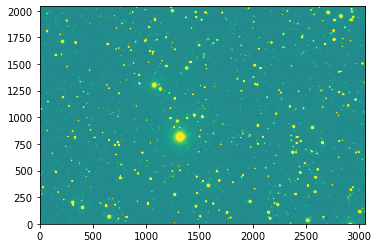

In [7]:
interval = ZScaleInterval()
norm = ImageNormalize( image_dat, interval=ZScaleInterval() )

plt.imshow( image_dat, norm=norm, origin='lower' )

In [8]:
image_header = fits.getheader( os.path.join(datapath, 'tfn0m410-kb98-20211004-0036-e91.fits.fz'), ext=1 )

In [9]:
image_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
XTENSION= 'BINTABLE'           / binary table extension                         
ZDITHER0=                  623 / dithering offset when quantizing floats        
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'tfn     '        

In [10]:
help(WCS)

Help on class WCS in module astropy.wcs.wcs:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS(header=None, fobj=None, key=' ', minerr=0.0, relax=True, naxis=None, keysel=None, colsel=None, fix=True, translate_units='', _do_set=True)
 |  
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: https://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : `~astropy.io.fits.Header`, `~astropy.io.fits.hdu.image.PrimaryHDU`, `~astropy.io.fits.hdu.image.ImageHDU`, str, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : `~astropy.io.fits.HDUList`, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a differ

In [11]:
sistema_coord = WCS(image_header)

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [12]:
sistema_coord

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 286.04410459  36.6315962767  
CRPIX : 1527.5  1021.5  
CD1_1 CD1_2  : -1.83320713718e-07  0.000158504479934  
CD2_1 CD2_2  : -0.000158504479934  -1.83320713718e-07  
NAXIS : 3054  2042

In [13]:
# Queremos saber las coordenadas en ascension recta (RA), declinacion (DEC) del pixel 1000,1500

coord_cielo = sistema_coord.pixel_to_world(1000,1500)


In [14]:
coord_cielo

<SkyCoord (ICRS): (ra, dec) in deg
    (286.13903649, 36.71492323)>

In [15]:
coord_cielo.to_string('hmsdms')

'19h04m33.36875693s +36d42m53.72364497s'

In [16]:
# Tres-1 coordinates: 19 04 09.8516024106 +36 37 57.445911611 
from astropy import units as u
from astropy.coordinates import SkyCoord

tres1_coord = SkyCoord( '19h04m09s +36d37m57s' )


In [17]:
tres1_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (286.0375, 36.6325)>

In [18]:
y, x = sistema_coord.world_to_pixel(tres1_coord)

In [19]:
print(x,y)

987.0556197158203 1520.835967523029


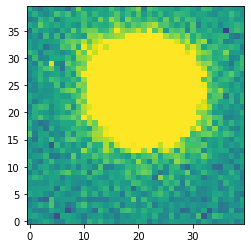

In [20]:
interval = ZScaleInterval()
norm = ImageNormalize( image_dat, interval=ZScaleInterval() )

plt.imshow( image_dat[980:1020,1500:1540], norm=norm, origin='lower' )

(0.0, 400.0)

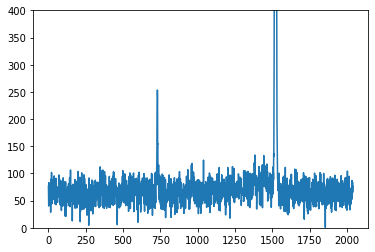

In [21]:
plt.plot(image_dat[1005,0:2040])
plt.ylim(0,400)

https://photutils.readthedocs.io/en/stable/aperture.html

- Pytorch
- CPU versus GPU

In [22]:
from photutils.aperture import CircularAperture
positions = [(30., 30.), (40., 40.)]
aperture = CircularAperture(positions, r=3.)

In [23]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils.aperture import SkyCircularAperture
positions = SkyCoord(l=[1.2, 2.3] * u.deg, b=[0.1, 0.2] * u.deg,
                     frame='galactic')
aperture = SkyCircularAperture(positions, r=4. * u.arcsec)

In [30]:
positions = [(30., 30.), (40., 40.)]
aperture = CircularAperture(positions, r=3.)

In [31]:
import numpy as np
from photutils.aperture import aperture_photometry
data = np.ones((100, 100))
phot_table = aperture_photometry(data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    30.0    30.0    28.274334
  2    40.0    40.0    28.274334


In [32]:
print(np.pi * 3. ** 2)  

28.274333882308138


In [33]:
phot_table = aperture_photometry(data, aperture, method='subpixel',
                                 subpixels=5)
print(phot_table)  


 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    30.0    30.0        27.96
  2    40.0    40.0        27.96


In [34]:
radii = [3., 4., 5.]
apertures = [CircularAperture(positions, r=r) for r in radii]
phot_table = aperture_photometry(data, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id xcenter ycenter aperture_sum_0 aperture_sum_1 aperture_sum_2
      pix     pix                                               
--- ------- ------- -------------- -------------- --------------
  1      30      30      28.274334      50.265482      78.539816
  2      40      40      28.274334      50.265482      78.539816


In [35]:
from photutils.aperture import EllipticalAperture
a = 5.
b = 3.
theta = np.pi / 4.
apertures = EllipticalAperture(positions, a, b, theta)
phot_table = aperture_photometry(data, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1      30      30     47.12389
  2      40      40     47.12389


In [36]:
a = [5., 6., 7.]
b = [3., 4., 5.]
theta = np.pi / 4.
apertures = [EllipticalAperture(positions, a=ai, b=bi, theta=theta)
             for (ai, bi) in zip(a, b)]
phot_table = aperture_photometry(data, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id xcenter ycenter aperture_sum_0 aperture_sum_1 aperture_sum_2
      pix     pix                                               
--- ------- ------- -------------- -------------- --------------
  1      30      30       47.12389      75.398224      109.95574
  2      40      40       47.12389      75.398224      109.95574


In [38]:
from photutils.aperture import CircularAnnulus
aperture = CircularAperture(positions, r=3)
annulus_aperture = CircularAnnulus(positions, r_in=6., r_out=8.)

In [39]:
apers = [aperture, annulus_aperture]
phot_table = aperture_photometry(data, apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1      30      30      28.274334      87.964594
  2      40      40      28.274334      87.964594


In [40]:
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

In [41]:
bkg_sum = bkg_mean * aperture.area
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table['residual_aperture_sum'])  

residual_aperture_sum
---------------------
       -1.0658141e-14
       -1.0658141e-14


In [42]:
from photutils.datasets import make_100gaussians_image
from photutils.aperture import CircularAperture, CircularAnnulus
data = make_100gaussians_image()
positions = [(145.1, 168.3), (84.5, 224.1), (48.3, 200.3)]
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

In [43]:
annulus_masks = annulus_aperture.to_mask(method='center')

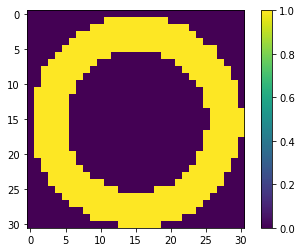

In [44]:
import matplotlib.pyplot as plt
plt.imshow(annulus_masks[0], interpolation='nearest')
plt.colorbar()

In [45]:
annulus_data = annulus_masks[0].multiply(data)

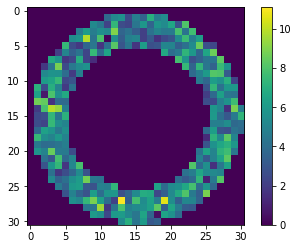

In [46]:
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.datasets import make_100gaussians_image

positions = [(145.1, 168.3), (84.5, 224.1), (48.3, 200.3)]
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)
annulus_masks = annulus_aperture.to_mask(method='center')
data = make_100gaussians_image()
annulus_data = annulus_masks[0].multiply(data)
plt.imshow(annulus_data, interpolation='nearest')
plt.colorbar()

In [47]:
mask = annulus_masks[0].data
annulus_data_1d = annulus_data[mask > 0]
annulus_data_1d.shape

(394,)

In [48]:
from astropy.stats import sigma_clipped_stats
_, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
print(median_sigclip)  

4.848212997882959


In [49]:
background = median_sigclip * aperture.area
print(background)  

380.7777584296913


In [50]:
from astropy.stats import sigma_clipped_stats
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAperture, CircularAnnulus
from photutils.datasets import make_100gaussians_image

data = make_100gaussians_image()
positions = [(145.1, 168.3), (84.5, 224.1), (48.3, 200.3)]
aperture = CircularAperture(positions, r=5)
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)
annulus_masks = annulus_aperture.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = np.array(bkg_median)
phot = aperture_photometry(data, aperture)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * aperture.area
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
for col in phot.colnames:
    phot[col].info.format = '%.8g'  # for consistent table output
print(phot)

 id xcenter ycenter aperture_sum annulus_median  aper_bkg aper_sum_bkgsub
      pix     pix                                                        
--- ------- ------- ------------ -------------- --------- ---------------
  1   145.1   168.3    1131.5794       4.848213 380.77776       750.80166
  2    84.5   224.1    746.16064      5.0884354 399.64478       346.51586
  3    48.3   200.3    1250.2186      4.8060599 377.46706        872.7515


In [51]:
positions = [(30., 30.), (40., 40.)]
aperture = CircularAperture(positions, r=3.)
data = np.ones((100, 100))
error = 0.1 * data

phot_table = aperture_photometry(data, aperture, error=error)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id xcenter ycenter aperture_sum aperture_sum_err
      pix     pix                                
--- ------- ------- ------------ ----------------
  1      30      30    28.274334       0.53173616
  2      40      40    28.274334       0.53173616


In [53]:
data = np.ones((5, 5))
aperture = CircularAperture((2, 2), 2.)
mask = np.zeros(data.shape, dtype=bool)
data[2, 2] = 100.  # bad pixel
mask[2, 2] = True
t1 = aperture_photometry(data, aperture, mask=mask)
t1['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(t1['aperture_sum'])

aperture_sum
------------
   11.566371


In [54]:
t2 = aperture_photometry(data, aperture)
t2['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(t2['aperture_sum'])


aperture_sum
------------
   111.56637


In [55]:
import astropy.units as u
from astropy.wcs import WCS
from photutils.datasets import load_spitzer_image, load_spitzer_catalog
hdu = load_spitzer_image()  
data = u.Quantity(hdu.data, unit=hdu.header['BUNIT'])  
wcs = WCS(hdu.header)  
catalog = load_spitzer_catalog()  

In [56]:
positions = SkyCoord(catalog['l'], catalog['b'], frame='galactic')  
aperture = SkyCircularAperture(positions, r=4.8 * u.arcsec)  

In [57]:
phot_table = aperture_photometry(data, aperture, wcs=wcs)  

In [58]:
import astropy.units as u
factor = (1.2 * u.arcsec) ** 2 / u.pixel
fluxes_catalog = catalog['f4_5']  
converted_aperture_sum = (phot_table['aperture_sum'] *
                          factor).to(u.mJy / u.pixel)  

Text(0, 0.5, 'Aperture photometry fluxes')

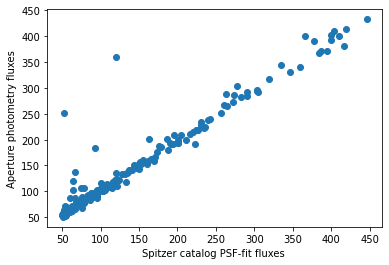

In [59]:
import matplotlib.pyplot as plt
plt.scatter(fluxes_catalog, converted_aperture_sum.value)
plt.xlabel('Spitzer catalog PSF-fit fluxes ')
plt.ylabel('Aperture photometry fluxes')

In [60]:
from photutils.aperture import CircularAperture
positions = [(30., 30.), (40., 40.)]
aperture = CircularAperture(positions, r=3.)

In [61]:
masks = aperture.to_mask(method='center')

In [62]:
mask = masks[0]
image = mask.to_image(shape=((200, 200)))

In [63]:
data_cutout = mask.cutout(data)

In [64]:
data_cutout_aper = mask.multiply(data)

tensor([[0.2829, 0.2256, 0.0115],
        [0.8971, 0.6095, 0.1502],
        [0.1561, 0.0405, 0.1578],
        [0.2869, 0.0137, 0.7186],
        [0.8409, 0.4943, 0.5194]])


True